# Dwell time distributions for kinesin's mechanical steps
##### section B.4 in master thesis (appendix)
So far, we investigated how coarse graining affects the distribution of the velocity and the entropy production of a kinesin motor. We differed between coarse-graining mappings that preserved the network topology of the original model and between mappings that reduced the number of fundamental cycles. 
There are further quantities of interest that characterise the mechanical steps of the molecular motor. The walk of kinesin is governed by four dwell time distributions corresponding to the four possible pairs of subsequent forward and backward steps (Valleriani et al. 2008) that are called co-steps. Their distributions can be calculated from the master equation if two absorbing states are added. The effective step dynamic is non-Markovian and based on conditional mechanical steps or co-steps (Valleriani et al. 2008). 
In this section, the dwell time distributions and the steady-state probabilities for the mechanical steps and co-steps in the kinesin model of Liepelt and Lipowsky is discussed.

After introducing the master equation for conditional probabilities and after discussing how to compute dwell time distributions for co-steps, we compute the steady-state probabilities for mechanical steps and co-steps in a tri-cyclic 6-state model of the motor kinesin.
To simplify the model, states can be merged. We compare a coarse-grained 4-state model with the 6-state model with respect to their steady-state probabilities for mechanical steps and co-steps. 
The 4-state model is further coarse grained. The 3-state model has a different network topology than the 6-state and the 4-state model. We will discuss the effect of coarse gaining fundamental cycles on the steady-state probabilities for mechanical steps and co-steps.
Finally, we will compare the dwell time distributions for the four co-steps and their respective average dwell time for the three different motor models.


## Markov chains with absorbing states
In this paragraph, we will shortly summarize how to compute the distribution of dwell times for Markov chains with absorbing states. states 1-6 are transient states and states 2' and 5' are absorbing states. The conditional probabilities that the process dwells in state $j$ at time $t$ given that is started in the initial states $i$ at time $t=0$ are denoted by $P_{ij}(t)$. The time evolution of the probabilities $P_{ij}(t)$ is governed by the master equation \citep{Valleriani}
\begin{align}
\dfrac{d}{dt}P_{ij}=\sum_{k\neq j} [P_{ik}(t) \alpha_{kj}-P_{ij}(t) \alpha_{jk}  ].
\label{eq:conditional_master_equation}
\end{align}
Probability is conserved such that $P_{ii}(0)=1$ and $\sum_j P_{ij}(t)=1$. In the steady state (denoted by index $st$), the probabilities of all transient states are zero and the probabilities of absorbing states add up to one. The steady-state probability $P_{ik}^{st}$ refers to the probability that starting in initial state $i$ the walk is absorbed in absorbing state $k$. The absorption probabilities  $P_{ik}^{st}$ can be computed either by finding the steady state of the conditional master equation or with the so-called closed diagram method presented by Hill \citep{hill}.
So far, we considered all possible walks of the Markov process. But we are particularly interested in the subset of walks that are eventually absorbed in an absorbing state $k$. Hence, we consider the conditional probabilities $P_{ij|k}(t)$ that a system dwells at time $t$ in state $j$ given that it started in initial state $i$ and is absorbed in state $k$.
The conditional probability is given by
\begin{align}
P_{ij|k}(t) = \dfrac{P_{ij,k}(t)}{P^{st}_{ik}}=\dfrac{P_{ij}(t)P^{st}_{jk}}{P^{st}_{ik}}.
\end{align}
The distribution of the dwell times can be obtained by 
\begin{align}
\rho ^{ab}_{i|k}(t) = \dfrac{d}{dt}P_{ik|k}(t)=\dfrac{1}{P^{st}_{ik}}\dfrac{d}{dt}P_{ik}(t),
\label{eq:distribution_dwell}
\end{align}
since $P^{st}_{kk}=1$ is one for an absorbing state $k$ \cite{Valleriani}.
To compute the distribution of dwell times analytically, we write the master equation in matrix notation
\begin{align}
\dfrac{d \textbf{P}_{i}}{dt}&=\textbf{W}\textbf{P}_{i},
\end{align}
where the subscript $i$ refers to the initial state $i \in \{2,5\}$ and $\left(\textbf{P}_{i} \right) _j$ is $P_{ij}$.
The matrix elements of $\textbf{W}$ are given by 
\begin{align}
W_{mn}= \begin{cases}
\alpha_{nm} &\text{ for } m\neq n \\
-\sum_{k\neq m} \alpha_{mk} &\text{ for }m=n.
\end{cases}
%\label{eq:exit_rates} 
\end{align}
The diagonal elements are called exit rates and ensure conservation of probability. The exit rate of state $m$ is the sum of all outgoing transition rates. 
The master equation is solved by
\begin{align}
\textbf{P}_{i}(t)=e^{\textbf{W}t}\textbf{P}_{i}(0),
\label{eq:solution_master_eq}
\end{align}
where $\textbf{G}(t) = e^{\textbf{W}t}$ denotes the propagator.

In [16]:
import numpy as np

from matplotlib import pyplot as plt
import math

import time
import random
import networkx as nx
import os

from scipy.linalg import expm, sinm, cosm

import sys
path='Bibliotheken/'
res2 = os.listdir(path)
print(res2)
sys.path.append(path)

import Steady_State_Calculation_Spanning_Trees as auto

['Steady_State_Calculation_Spanning_Trees.py', 'Kinesin_Parameters.py', 'Analytic_Quantities.py', 'PDF_Flux_entropy.py', 'Bib3_version4b.py', '__pycache__']


In [7]:
def frequencies_of_costeps(force, cP, cADP, cATP):
    w = Kinesin2(force, cP, cADP, cATP)
    G=auto.Matrix2Graph(w)
    p=auto.steady_state(G)
    forwardflux = w[2-1][5-1]*p[2-1]
    backwardflux = w[5-1][2-1]*p[5-1]
    forwardflux_normed = forwardflux/(forwardflux+backwardflux)
    backwardflux_normed = backwardflux/(forwardflux+backwardflux)
    
    #given forward step
    a52=w[5-1][2-1]
    a25=w[2-1][5-1]
    w[5-1][2-1]=1e-32
    #calculate steady-state
    G=auto.Matrix2Graph(w)
    p=auto.steady_state(G)
    Jf=a25*p[2-1]
    Jb=a52*p[5-1]
    Mff=Jf/(Jf+Jb)
    Mfb=Jb/(Jf+Jb)
    
    ff=Jf/(Jf+Jb)*1/(Jf+Jb)
    fb=Jb/(Jf+Jb)*1/(Jf+Jb)
    
    w = Kinesin2(force, cP, cADP, cATP)
    #given backward step
    a52=w[5-1][2-1]
    a25=w[2-1][5-1]
    w[2-1][5-1]=1e-32
    #calculate steady-state
    G=auto.Matrix2Graph(w)
    p=auto.steady_state(G)
    Jf=a25*p[2-1]
    Jb=a52*p[5-1]
    Mbf=Jf/(Jf+Jb)
    Mbb=Jb/(Jf+Jb)
    
    bf=Jf/(Jf+Jb)*1/(Jf+Jb)
    bb=Jb/(Jf+Jb)*1/(Jf+Jb)
    
    pi_f=Mbf/(Mbf+Mfb)
    pi_b=Mfb/(Mbf+Mfb)
    
    p_ff=pi_f*Mff
    p_fb=pi_f*Mfb
    p_bf=pi_b*Mbf
    p_bb=pi_b*Mbb
    return p_ff, p_fb, p_bf, p_bb, pi_f, pi_b, forwardflux_normed, backwardflux_normed, ff, fb, bf, bb

def Kinesin2(force, cP, cADP, cATP):
    #Parametrisierung von Kinesin vgl. Liepelt
    #force 
    F=force#1.e-12 #pico Newtons Groessenordnung
    #stepping size l=8nm
    l=8.e-9
    #BoltzmannFaktor Ruamtemperatur [Joule]
    kT=4.e-21
    #rate constants (see Table1 Liepelt) Expt. [9]
    k25=3.0e5 # dimension 1/s
    k52=0.24
    k21=100.
    k56=200.
    k61=k56
    k65=0.09e6 # dimension 1/(micro M s) = 1e6 1/Mol*s
    k16=0.02e6
    k12=1.8e6
    #equlibirum konstancts
    Keq=4.9e11*1e-6 #M=mol
    Keq1=k25*k56*k61*k12/(k52*k65*k16*k21) # corresponds to forward cycle

    k23=k56 # from ADP+ATP to empty + ATP
    k32=k65 # from empty+ATP to ADP +ATP
    k34=k61 #from ATP to ADP (rest empty)
    k43=k16 #from ADP to ATP (rest empyt)
    k45=k12 # from empty +ADP +to ATP +ADP
    #k54=   k52*k23*k34*k45/(k25*k32*k43*Keq1)
    k54=(k52/k25)**2*k21

    #equlibirum konstancts
    Keq2=k52*k23*k34*k45/(k25*k32*k43*k54) # corresponds to backward cycle
    #chemical transitions

    #mechanical tranistions
    theta=0.3 #load distribution factor aacording to Ref[9]
    Fdim=l*F/kT
    #transition matrix
    w=np.zeros((7,7))
    w[2][5]=k25*math.exp(-theta*Fdim)
    w[5][2]=k52*math.exp((1-theta)*Fdim)
    #chemical transitions
    XI61=0.05 #they are symmetric
    XI56=XI61
    XI23=XI61
    XI34=XI61
    XI12=0.25 #according to Ref[9]
    XI45=XI12

    w[1][2]=k12*cATP*2./(1+math.exp(XI12*Fdim))
    w[2][1]=k21*     2./(1+math.exp(XI12*Fdim))

    w[4][5]=k45*cATP*2./(1+math.exp(XI45*Fdim))
    w[5][4]=k54*     2./(1+math.exp(XI45*Fdim))

    w[6][5]=k65*cADP*2./(1+math.exp(XI56*Fdim))
    w[5][6]=k56*     2./(1+math.exp(XI56*Fdim))

    w[3][2]=k32*cADP*2./(1+math.exp(XI23*Fdim))
    w[2][3]=k23*     2./(1+math.exp(XI23*Fdim))

    w[1][6]=k16*cP  *2./(1+math.exp(XI61*Fdim))
    w[6][1]=k61*     2./(1+math.exp(XI61*Fdim))

    w[4][3]=k43*cP  *2./(1+math.exp(XI34*Fdim))
    w[3][4]=k34*     2./(1+math.exp(XI34*Fdim))

    wsliced= w[:,1:]
    wsliced=np.delete(wsliced, 0, 0)
    #print wsliced
    
    return wsliced

In [8]:
FORCE=np.arange(0, 23e-12, 3e-13)

p_ff=[]
p_fb=[]
p_bf=[]
p_bb=[]
pi_f=[]
pi_b=[]
forwardflux_normed=[]
backwardflux_normed=[]
M_ff=[]
M_fb=[]
M_bf=[]
M_bb=[]
for f in FORCE:
    a,b,c,d, forwardSTEP, backwardSTEP, J1, J2, mff, mfb, mbf, mbb = frequencies_of_costeps(force=f, cP=1e-6, cADP=1e-6, cATP=1e-6)
    p_ff.append(a)
    p_fb.append(b)
    p_bf.append(c)
    p_bb.append(d)
    pi_f.append(forwardSTEP)
    pi_b.append(backwardSTEP)
    forwardflux_normed.append(J1)
    backwardflux_normed.append(J2)
    M_ff.append(mff)
    M_fb.append(mfb)
    M_bf.append(mbf)
    M_bb.append(mbb)

# Probabilities of forward and backward steps

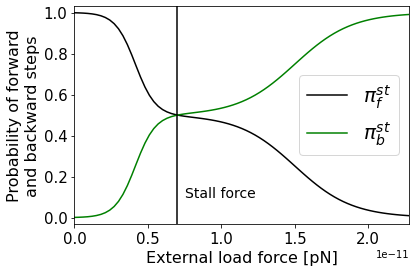

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=16)
ax.set_ylabel('Probability of forward\nand backward steps',fontsize=16)

ax.plot(FORCE, pi_f , color='black', label='$π_{f}^{st}$')
ax.plot(FORCE, pi_b , color='green', label='$π_{b}^{st}$')

ax.plot([7e-12, 7e-12],[-0.1,1.1], color='black')
plt.text(7.5e-12, 0.1, 'Stall force', fontsize=14 )
ax.set_ylim([-0.03,1.03])

ax.set_xlim([np.min(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=15)
ax.legend(prop={'size': 20})#, loc='upper left'
plt.show()

# Probabilities of co-steps

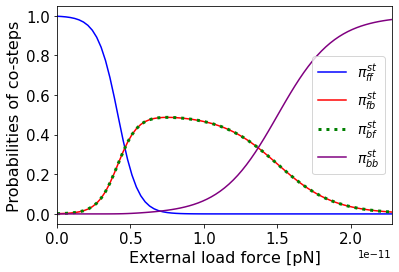

In [6]:
path='Figures_Freq_Steps_and_Co-Steps/'

fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=16)
ax.set_ylabel('Probabilities of co-steps',fontsize=16)

ax.plot(FORCE, p_ff ,  color='blue', label='$π_{ff}^{st}$')
ax.plot(FORCE, p_fb , color='red', label='$π_{fb}^{st}$')
ax.plot(FORCE, p_bf ,linestyle='dotted', linewidth=3,  color='green', label='$π_{bf}^{st}$')
ax.plot(FORCE, p_bb , color='purple', label='$π_{bb}^{st}$')


ax.set_xlim([np.min(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=15)
ax.legend(prop={'size': 14})
plt.show()

# Co-steps distributions

In [14]:
def relaxation_6_state(matrix, p_zero, time):
    p_1=[]
    p_2=[]
    p_3=[]
    p_4=[]
    p_5=[]
    p_6=[]
    p_2_ab=[]
    p_5_ab=[]
    for t in time:
        prob=np.dot(expm(matrix*t),p_zero)
        p_1.append(prob[1-1])
        p_2.append(prob[2-1])
        p_3.append(prob[3-1])
        p_4.append(prob[4-1])
        p_5.append(prob[5-1])
        p_6.append(prob[6-1])
        p_2_ab.append(prob[7-1])
        p_5_ab.append(prob[8-1])
        summe=0
        for p in prob:
            summe=summe+p
        if summe>1.01:
            print('ERROR: PRobabilitiy not conserved anymore')
            print('time '+str(t))
            print('probability '+str(prob))
            break
    return np.array(p_1), np.array(p_2), np.array(p_3), np.array(p_4), np.array(p_5), np.array(p_6), np.array(p_2_ab), np.array(p_5_ab)

def Kinesin(force):
    cP =1e-6 
    cADP =1e-6
    cATP=1e-6
    #Parametrisierung von Kinesin vgl. Liepelt
    #force 
    F=force#1.e-12 #pico Newtons Groessenordnung
    #stepping size l=8nm
    l=8.e-9
    #BoltzmannFaktor Ruamtemperatur [Joule]
    kT=4.e-21
    #rate constants (see Table1 Liepelt) Expt. [9]
    k25=3.0e5 # dimension 1/s
    k52=0.24
    k21=100.
    k56=200.
    k61=k56
    k65=0.09e6 # dimension 1/(micro M s) = 1e6 1/Mol*s
    k16=0.02e6
    k12=1.8e6
    #equlibirum konstancts
    Keq=4.9e11*1e-6 #M=mol
    Keq1=k25*k56*k61*k12/(k52*k65*k16*k21) # corresponds to forward cycle

    k23=k56 # from ADP+ATP to empty + ATP
    k32=k65 # from empty+ATP to ADP +ATP
    k34=k61 #from ATP to ADP (rest empty)
    k43=k16 #from ADP to ATP (rest empyt)
    k45=k12 # from empty +ADP +to ATP +ADP
    #k54=   k52*k23*k34*k45/(k25*k32*k43*Keq1)
    k54=(k52/k25)**2*k21

    #equlibirum konstancts
    Keq2=k52*k23*k34*k45/(k25*k32*k43*k54) # corresponds to backward cycle
    #chemical transitions

    #mechanical tranistions
    theta=0.3 #load distribution factor aacording to Ref[9]
    Fdim=l*F/kT
    #transition matrix
    w=np.zeros((7,7))
    w[2][5]=k25*math.exp(-theta*Fdim)
    w[5][2]=k52*math.exp((1-theta)*Fdim)
    #chemical transitions
    XI61=0.05 #they are symmetric
    XI56=XI61
    XI23=XI61
    XI34=XI61
    XI12=0.25 #according to Ref[9]
    XI45=XI12

    w[1][2]=k12*cATP*2./(1+math.exp(XI12*Fdim))
    w[2][1]=k21*     2./(1+math.exp(XI12*Fdim))

    w[4][5]=k45*cATP*2./(1+math.exp(XI45*Fdim))
    w[5][4]=k54*     2./(1+math.exp(XI45*Fdim))

    w[6][5]=k65*cADP*2./(1+math.exp(XI56*Fdim))
    w[5][6]=k56*     2./(1+math.exp(XI56*Fdim))

    w[3][2]=k32*cADP*2./(1+math.exp(XI23*Fdim))
    w[2][3]=k23*     2./(1+math.exp(XI23*Fdim))

    w[1][6]=k16*cP  *2./(1+math.exp(XI61*Fdim))
    w[6][1]=k61*     2./(1+math.exp(XI61*Fdim))

    w[4][3]=k43*cP  *2./(1+math.exp(XI34*Fdim))
    w[3][4]=k34*     2./(1+math.exp(XI34*Fdim))

    wsliced= w[:,1:]
    wsliced=np.delete(wsliced, 0, 0)
    #print wsliced
    return wsliced

def frequencies_of_costeps(force):
    w = Kinesin(force)
    G=auto.Matrix2Graph(w)
    p=auto.steady_state(G)
    forwardflux = w[2-1][5-1]*p[2-1]
    backwardflux = w[5-1][2-1]*p[5-1]
    forwardflux_normed = forwardflux/(forwardflux+backwardflux)
    backwardflux_normed = backwardflux/(forwardflux+backwardflux)
    
    #given forward step
    a52=w[5-1][2-1]
    a25=w[2-1][5-1]
    w[5-1][2-1]=1e-32
    #calculate steady-state
    G=auto.Matrix2Graph(w)
    p=auto.steady_state(G)
    Jf=a25*p[2-1]
    Jb=a52*p[5-1]
    Mff=Jf/(Jf+Jb)
    Mfb=Jb/(Jf+Jb)
    
    ff=Jf/(Jf+Jb)*1/(Jf+Jb)
    fb=Jb/(Jf+Jb)*1/(Jf+Jb)
    
    w = Kinesin(force)
    #given backward step
    a52=w[5-1][2-1]
    a25=w[2-1][5-1]
    w[2-1][5-1]=1e-32
    #calculate steady-state
    G=auto.Matrix2Graph(w)
    p=auto.steady_state(G)
    Jf=a25*p[2-1]
    Jb=a52*p[5-1]
    Mbf=Jf/(Jf+Jb)
    Mbb=Jb/(Jf+Jb)
    return Mff, Mfb, Mbf, Mbb, a52, a25

def absorbing_matrix(matrix):
    #copy
    k=1
    w=np.zeros((8,8))
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            w[i][j]=matrix[j][i]     # Achtung Indices getauscht
    
    w[2-k][5-k]=0
    w[5-k][2-k]=0
    w[7-k][5-k]=matrix[5-k][2-k] # 5->2 backward
    w[8-k][2-k]=matrix[2-k][5-k] # 2->5 forward
    #diagonal elements: exit rates
    for i in range(6):
        exit_rate=0
        for k in range(6):
            exit_rate=exit_rate+matrix[i][k]
        w[i][i]=-exit_rate
    #w[7-k][7-k]=1
    #w[8-k][8-k]=1
    return w

In [12]:
FORCE=5e-12
t=np.logspace(-8,2, 200) # for F=5pN
#FORCE=0
#t=np.logspace(-8,1, 200)  # for F=0pN
w=Kinesin(force=FORCE)
w_ab=absorbing_matrix(matrix=w)

# Starting state = 2 (previous backward step)

In [17]:
start_t=0
start_p2=np.array([0,1,0,0,0,0,0,0])
p_1, p_2, p_3, p_4, p_5, p_6, p_2_ab, p_5_ab=relaxation_6_state(matrix=w_ab, p_zero=start_p2, time=t)

# Starting state = 5 (previous forward step)

In [18]:
start_t=0
start_p5=np.array([0,0,0,0,1,0,0,0])
q_1, q_2, q_3, q_4, q_5, q_6, q_2_ab, q_5_ab=relaxation_6_state(matrix=w_ab, p_zero=start_p5, time=t)

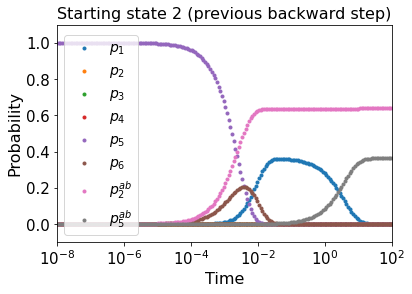

In [19]:
fig, ax= plt.subplots()
ax.set_title('Starting state 2 (previous backward step)', fontsize=16)
ax.scatter(t, q_1, marker='.', label='$p_1$')
ax.scatter(t, q_2, marker='.', label='$p_2$')
ax.scatter(t, q_3, marker='.', label='$p_3$')
ax.scatter(t, q_4, marker='.', label='$p_4$')
ax.scatter(t, q_5, marker='.', label='$p_5$')
ax.scatter(t, q_6, marker='.', label='$p_6$')
ax.scatter(t, q_2_ab, marker='.', label='$p_2^{ab}$')
ax.scatter(t, q_5_ab, marker='.', label='$p_5^{ab}$')
ax.set_xlim([np.min(t),np.max(t)])
ax.set_ylim([-0.1, 1.1])

ax.set_xlabel('Time',fontsize=16)
ax.set_ylabel( 'Probability',fontsize=16)
ax.set_xscale('log')
ax.legend(prop={'size': 14}, loc='lower left')
ax.tick_params(axis='both', labelsize=15)
plt.show()

In [20]:
M_ff, M_fb, M_bf, M_bb, a52, a25 = frequencies_of_costeps(force=FORCE)

#startstate 2
rho_bf=p_2*a25/M_bf
rho_bb=p_5*a52/M_bb

rho_ff=q_2*a25/M_ff
rho_fb=q_5*a52/M_fb

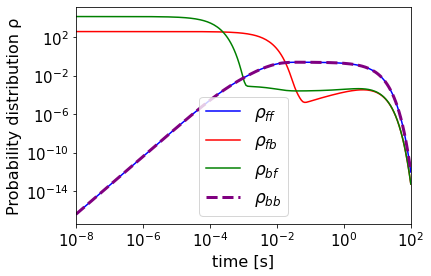

In [21]:
fig, ax = plt.subplots()
ax.set_xlabel('time [s]',fontsize=16)
ax.set_ylabel('Probability distribution ρ',fontsize=16)

ax.plot(t, rho_ff , color='blue', label='$ρ_{ff}$')
ax.plot(t, rho_fb , color='red', label='$ρ_{fb}$')
ax.plot(t, rho_bf , color='green', label='$ρ_{bf}$')
ax.plot(t, rho_bb , linestyle='dashed', linewidth=3, color='purple', label='$ρ_{bb}$')


ax.set_xlim([np.min(t),np.max(t)])
ax.tick_params(axis='both', labelsize=15)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(prop={'size': 17}, loc='lower center')
plt.show()